In [9]:
# lab9_k_means_all_exercises.ipynb
# 22 Jun 2025
# Lab: K-Means Clustering

# **Lab: K-Means Clustering**

## **Lab Objectives**
1. Understand the fundamentals of **K-Means Clustering**, an unsupervised learning algorithm.
2. Learn how to **choose the optimal number of clusters (K)** using the **Elbow Method** and **Silhouette Analysis**.
3. Implement K-Means clustering in Python using **scikit-learn**.
4. Visualize clusters and interpret results.

---

# **Program 1: Basic K-Means Clustering with Synthetic Data**
### **Objective**: Implement K-Means on a synthetic dataset and visualize clusters.



### **Lab Exercises**
1. **Demonstrates the basic implementation of K-Means clustering on a synthetic dataset.**

   - Generate synthetic data with clear clusters
   - Apply K-Means clustering
   - Apply K-Means clustering

3. **Experiment with Different K Values**  
   - Modify Program 1 to test `K=2,4,5`. How do clusters change?  
   - Which `K` seems most appropriate?  

4. **Impact of Initialization**  
   - Compare `init='random'` vs `init='k-means++'` in Program 1.  
   - Does the algorithm converge faster with `k-means++`?  


===================STEP 1: GENERATE SYNTHETIC DATA====================

Data shape: (300, 2)


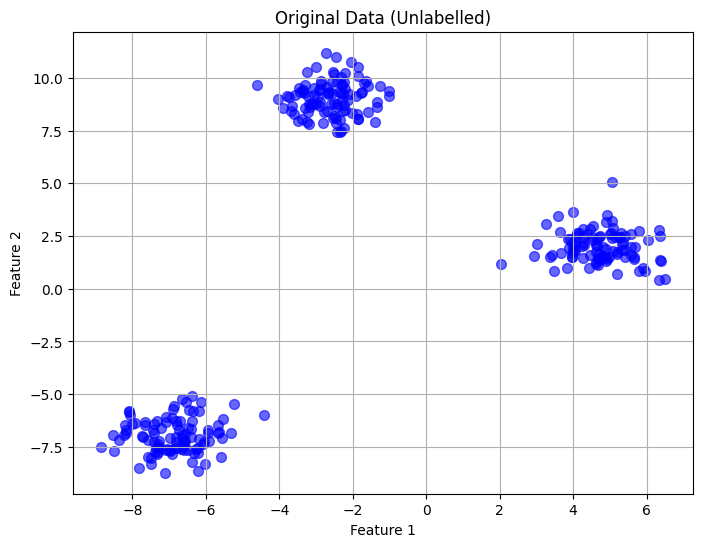

STEP 2: STANDARDIZE FEATURES=====================
STEP 3: APPLY K-MEANS========================

Cluster Centers (Scaled Coordinates):
[[-0.20998194  1.16447374]
 [-1.09011796 -1.26212427]
 [ 1.30009991  0.09765053]]
STEP 4: VISUALIZE CLUSTERS======================


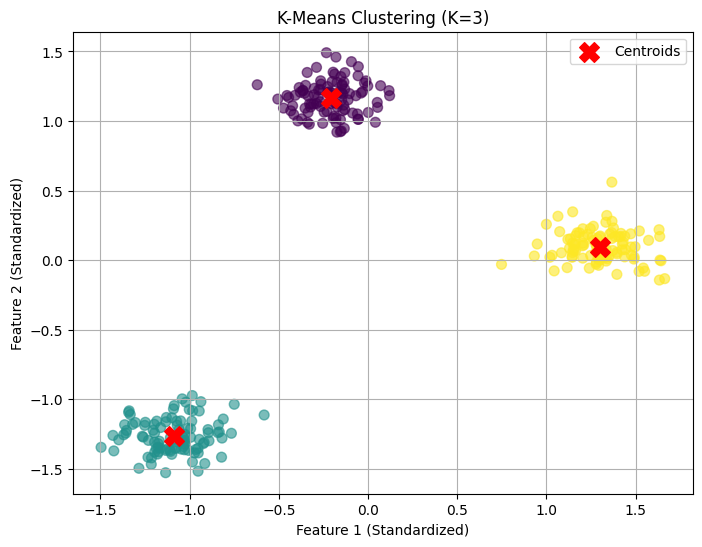

'\nINTERPRETATION:\n- Points are grouped into 3 distinct clusters.\n- Centroids (red X) represent the mean of each cluster.\n- K-Means successfully identified the underlying structure.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ======================================================================
# 1. GENERATE SYNTHETIC DATA
# ======================================================================
print("STEP 1: GENERATE SYNTHETIC DATA".center(70, '='))

"""
WHY SYNTHETIC DATA?
- We can control the number of clusters and their distribution.
- Helps in understanding how K-Means works before applying it to real-world data.
"""

# Generate 300 samples with 3 clusters
X, y = make_blobs(
    n_samples=300,          # Number of data points
    centers=3,             # Number of clusters
    cluster_std=0.8,       # Standard deviation of clusters (controls spread)
    random_state=42        # Ensures reproducibility
)

print(f"\nData shape: {X.shape}")  # Should be (300, 2) → 300 samples, 2 features

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.6)
plt.title("Original Data (Unlabelled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# ======================================================================
# 2. SCALING THE DATA
# ======================================================================
print("\nSTEP 2: STANDARDIZE FEATURES".center(70, '='))

"""
WHY SCALING?
- K-Means uses Euclidean distance → sensitive to feature scales.
- Features on different scales can bias clustering.
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================================================================
# 3. APPLY K-MEANS CLUSTERING
# ======================================================================
print("\nSTEP 3: APPLY K-MEANS".center(70, '='))

"""
K-MEANS PARAMETERS:
- n_clusters: Number of clusters (K)
- init: Initialization method ('random' or 'k-means++')
- max_iter: Maximum iterations per run
- random_state: Ensures reproducibility
"""

kmeans = KMeans(
    n_clusters=3,          # We know there are 3 clusters (from make_blobs)
    init='k-means++',      # Smart initialization (better than random)
    max_iter=300,          # Maximum iterations
    random_state=42
)

# Fit the model and predict clusters
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)  # Cluster assignments (0, 1, 2)
centroids = kmeans.cluster_centers_  # Coordinates of cluster centers

print("\nCluster Centers (Scaled Coordinates):")
print(centroids)

# ======================================================================
# 4. VISUALIZE CLUSTERS
# ======================================================================
print("\nSTEP 4: VISUALIZE CLUSTERS".center(70, '='))

plt.figure(figsize=(8, 6))

# Plot data points colored by cluster
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels,              # Color by cluster label
    cmap='viridis',        # Color map for clusters
    s=50,                  # Marker size
    alpha=0.6             # Transparency
)

# Plot centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red',               # Color centroids red
    marker='X',            # Use 'X' for centroids
    s=200,                 # Larger size for visibility
    label='Centroids'
)

plt.title("K-Means Clustering (K=3)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- Points are grouped into 3 distinct clusters.
- Centroids (red X) represent the mean of each cluster.
- K-Means successfully identified the underlying structure.
"""


# **Program 2: Choosing the Optimal K (Elbow Method & Silhouette Analysis)**
### **Objective**: Determine the best number of clusters (K) using two methods.

```python
"""
DETERMINING OPTIMAL K IN K-MEANS
================================
Write a program to demonstrate the two methods for choosing K:
1. The Elbow Method (inertia vs K)
2. Silhouette Analysis (cluster cohesion vs separation)
"""

========================STEP 1: GENERATE DATA=========================
STEP 2: ELBOW METHOD=========================


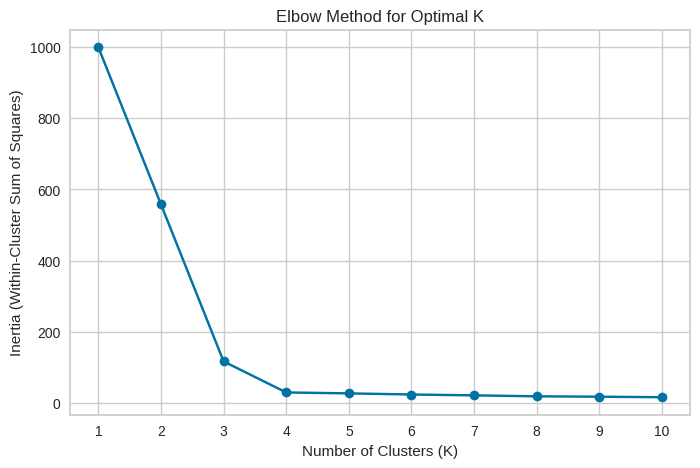

STEP 3: SILHOUETTE ANALYSIS=====================


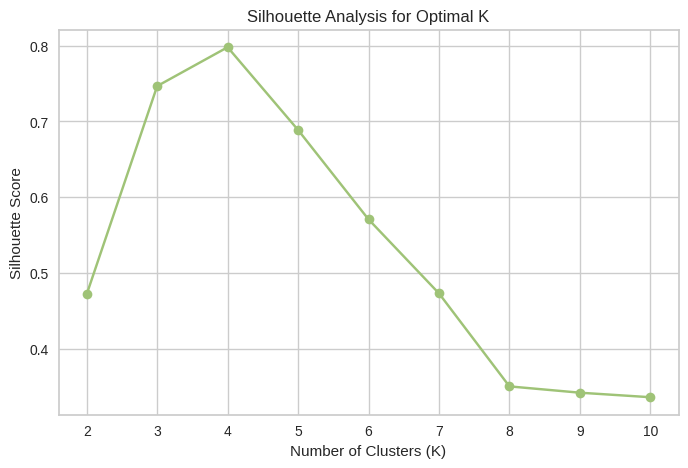

STEP 4: SILHOUETTE VISUALIZATION (K=4)================


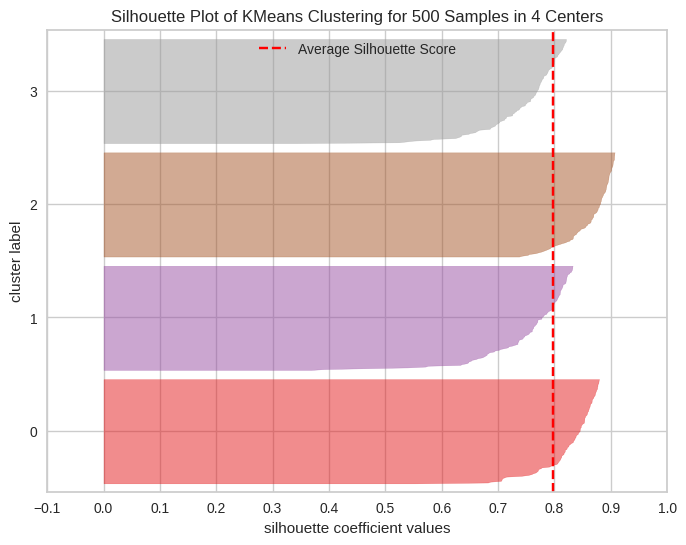

'\nSILHOUETTE PLOT EXPLANATION:\n- Each colored region represents a cluster.\n- Thickness = cluster size.\n- Dashed line = average silhouette score.\n- Ideally, all bars should be above average and similar in size.\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer  # Requires `yellowbrick`

# ======================================================================
# 1. GENERATE DATA
# ======================================================================
print("STEP 1: GENERATE DATA".center(70, '='))

# Create a dataset with 4 clusters (but pretend we don't know this)
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================================================================
# 2. ELBOW METHOD
# ======================================================================
print("\nSTEP 2: ELBOW METHOD".center(70, '='))

"""
ELBOW METHOD:
- Plot inertia (sum of squared distances to centroids) vs K.
- Look for the "elbow" where inertia starts decreasing linearly.
"""

# Test K from 1 to 10
K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # Store inertia for each K

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- The "elbow" is at K=4 → optimal number of clusters.
- Beyond K=4, adding more clusters doesn't significantly reduce inertia.
"""

# ======================================================================
# 3. SILHOUETTE ANALYSIS
# ======================================================================
print("\nSTEP 3: SILHOUETTE ANALYSIS".center(70, '='))

"""
SILHOUETTE SCORE:
- Measures how similar a point is to its own cluster vs other clusters.
- Range: [-1, 1] → Higher is better.
"""

silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- The highest silhouette score occurs at K=4 → best clustering structure.
- Confirms the Elbow Method's suggestion.
"""

# ======================================================================
# 4. VISUALIZE SILHOUETTE FOR K=4 (OPTIMAL)
# ======================================================================
print("\nSTEP 4: SILHOUETTE VISUALIZATION (K=4)".center(70, '='))

plt.figure(figsize=(8, 6))
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=42))
visualizer.fit(X_scaled)
visualizer.show()

"""
SILHOUETTE PLOT EXPLANATION:
- Each colored region represents a cluster.
- Thickness = cluster size.
- Dashed line = average silhouette score.
- Ideally, all bars should be above average and similar in size.
"""


## **Program 3 : K-Means on Iris Dataset**
### **Objective**: Cluster iris flowers based on sepal/petal measurements.

```python
"""
K-MEANS ON IRIS DATASET
=======================

1. Load the built-in Iris dataset
2. Determine optimal K
3. Visualize the results of clustering
4. Compare clusters with actual species labels
"""

==========================STEP 1: LOAD DATA===========================

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data Shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
STEP 2: SCALE DATA & FIND OPTIMAL K=================


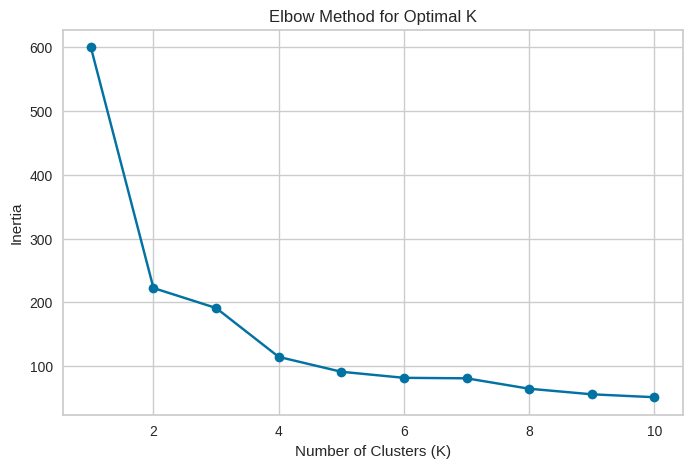

STEP 3: APPLY K-MEANS (K=3)=====================

Cluster Distribution:
Cluster
0    96
1    33
2    21
Name: count, dtype: int64
STEP 4: VISUALIZE CLUSTERS======================


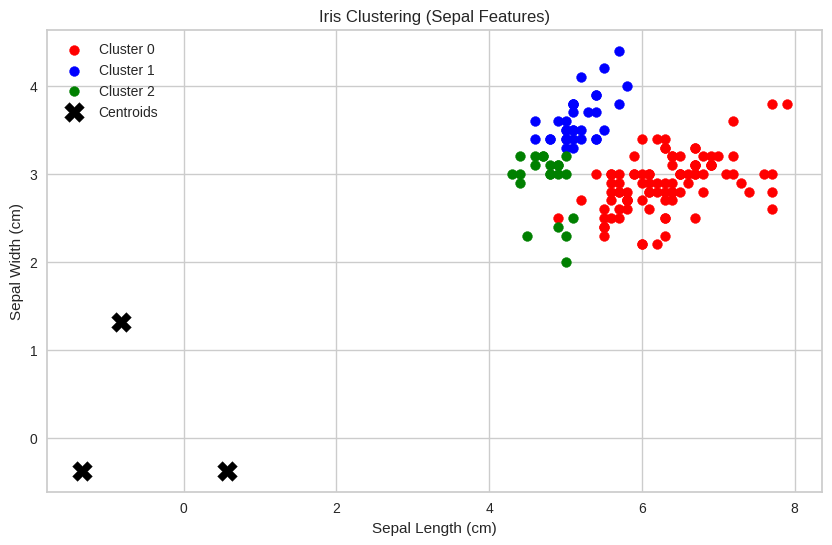

'\nINTERPRETATION:\n- Clear separation between clusters in 2D space.\n- Compare with actual species (not shown here) for accuracy assessment.\n'

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ======================================================================
# 1. LOAD IRIS DATA
# ======================================================================
print("STEP 1: LOAD DATA".center(70, '='))

iris = datasets.load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
feature_names = iris.feature_names

print(f"\nFeature Names: {feature_names}")
print(f"Data Shape: {X.shape}")

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
print("\nFirst 5 rows:")
print(df.head())

# ======================================================================
# 2. SCALE DATA & FIND OPTIMAL K
# ======================================================================
print("\nSTEP 2: SCALE DATA & FIND OPTIMAL K".center(70, '='))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- The elbow appears at K=3 (matches actual iris species count)
"""

# ======================================================================
# 3. APPLY K-MEANS (K=3)
# ======================================================================
print("\nSTEP 3: APPLY K-MEANS (K=3)".center(70, '='))

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add clusters to DataFrame
df['Cluster'] = labels
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# ======================================================================
# 4. VISUALIZE CLUSTERS (2D Projection)
# ======================================================================
print("\nSTEP 4: VISUALIZE CLUSTERS".center(70, '='))

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

# Plot first two features (sepal length/width)
for i in range(3):
    plt.scatter(
        X[labels == i, 0], X[labels == i, 1],
        s=50, c=colors[i],
        label=f'Cluster {i}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker='X', c='black', label='Centroids'
)

plt.title("Iris Clustering (Sepal Features)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- Clear separation between clusters in 2D space.
- Compare with actual species (not shown here) for accuracy assessment.
"""



## **Discussion Questions**
1. **When does K-Means perform poorly?**  
   - Non-globular clusters  
   - Varying cluster densities  

2. **How does scaling affect K-Means?**  
   - Euclidean distance is scale-sensitive → always standardize features.  

3. **Alternatives to K-Means?**  
   - DBSCAN (density-based)  
   - Hierarchical clustering  

4. **Business Applications?**  
   - Customer segmentation  
   - Anomaly detection  

---
